### Você é capaz de prever quem vai sobreviver ao naufrágio do Titanic?

###### Este notebook contém a minha solução para o desafio proposto pela [1ª Competição Data Train no Kaggle](https://www.kaggle.com/c/data-train-competicao-ml-1-titanic) onde consegui a 4ª melhor posição na competição. <br>

#### Conheça a comunidade:
##### A Data Train é uma comunidade aberta voltada para a área de dados e inteligência artificial que tem como principal objetivo fomentar e contribuir com a transformação data-driven de pessoas, empresas e sociedade civil através de meetups, eventos, cursos e um bom bate-papo entre profissionais.

##### Torne-se membro da comunidade através dos [canais](https://linktr.ee/datatrain).

##### [Aqui](https://github.com/wandersondsm/Competicao-ML-1---Data-Train) você encontra todo o material disponibilizado para a competição.

In [1]:
import pandas as pd
import numpy as np

##### Dados
* Farei o mesmo tratamento tanto para os dados de treino quanto para os dados de teste.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
1,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
2,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
3,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
4,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,132,3,"Coelho, Mr. Domingos Fernandeo",male,20.00,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
1,39,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,NaN,S
2,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
3,660,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
4,799,3,"Ibrahim Shawah, Mr. Yousseff",male,30.00,0,0,2685,7.2292,NaN,C


##### Coluna Name
* Ao analisar a coluna `Name` pude ver que em todos os registros há um forma de tratamento para cada passageiro.

In [5]:
train_title = train.copy()
test_title = test.copy()

In [6]:
# Extrai apenas os pronomes e coloquei em uma nova coluna chamada Title.
train_title['Title'] = train_title['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_title['Title'] = test_title['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [7]:
train_title.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Mr
1,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S,Miss
2,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
3,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S,Mr
4,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,Mr


In [8]:
train_title['Title'].value_counts()

Mr          353
Miss        127
Mrs          97
Master       28
Dr            6
Rev           3
Mlle          2
Countess      1
Ms            1
Capt          1
Col           1
Sir           1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

* Depois fiz o `label encoding` ou `integer encoding`.

In [9]:
title_mapped = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 
                'Master': 3, 'Dr': 3, 'Rev': 3, 'Mlle': 3, 'Ms': 3, 'Capt': 3, 
                'Col': 3, 'Countess': 3, 'Jonkheer': 3, 'Sir': 3, 'Mme': 3}

In [10]:
train_title['Title'] = train_title['Title'].map(title_mapped)
train_title['Title'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
test_title['Title'] = test_title['Title'].map(title_mapped)
test_title['Title'].unique()

array([ 0.,  1.,  3.,  2., nan])

In [12]:
# Retirei os valores NAN do dataframe de testes
test_title.update(test_title['Title'].fillna(3))

In [13]:
test_title['Title'].isnull().sum()

0

In [14]:
train_title.drop(['Name'], inplace=True, axis=1)
test_title.drop(['Name'], inplace=True, axis=1)

In [15]:
train_title.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,476,0,1,male,NaN,0,0,110465,52.0000,A14,S,0
1,57,1,2,female,21.0,0,0,C.A. 31026,10.5000,NaN,S,1
2,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,1
3,741,1,1,male,NaN,0,0,16988,30.0000,D45,S,0
4,699,0,1,male,49.0,1,1,17421,110.8833,C68,C,0


##### Coluna Ticket
* Na coluna `Ticket` também pode ser analisada, vejamos.

In [16]:
train_ticket = train_title.copy()
test_ticket = test_title.copy()

In [17]:
train_ticket.groupby(['Ticket']).count().sort_values('Survived', ascending=False).head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
Ticket,,,,,,,,,,,
1601,7,7,7,7,4,7,7,7,0,7,7
CA 2144,5,5,5,5,5,5,5,5,0,5,5
347082,5,5,5,5,5,5,5,5,0,5,5
S.O.C. 14879,5,5,5,5,5,5,5,5,0,5,5
382652,4,4,4,4,4,4,4,4,0,4,4
CA. 2343,4,4,4,4,0,4,4,4,0,4,4
17421,4,4,4,4,3,4,4,4,3,4,4
113781,4,4,4,4,4,4,4,4,3,4,4
2666,4,4,4,4,4,4,4,4,0,4,4


In [18]:
# Na coluna Ticket tem um registro sem número, substituí por '0' para que eu pudesse tratar depois retirando
# as palavras e deixando os números.
train_ticket = train_ticket.replace('LINE', '0')
test_ticket = test_ticket.replace('LINE', '0')

In [19]:
split_train_ticket = train_ticket['Ticket'].str.split()
split_train_ticket = np.array(split_train_ticket.values)

split_test_ticket = test_ticket['Ticket'].str.split()
split_test_ticket = np.array(split_test_ticket.values)

In [20]:
# Retiro as palavras e salvo apenas os números dos tickets
new_ticket_train = []
for i in split_train_ticket:
    if np.shape(i) == (1,):
        new_ticket_train.append(i[0])
    else:
        new_ticket_train.append(i[-1])

new_ticket_test = []
for i in split_test_ticket:
    if np.shape(i) == (1,):
        new_ticket_test.append(i[0])
    else:
        new_ticket_test.append(i[-1])

In [21]:
new_ticket_train[0:5]

['110465', '31026', '17755', '16988', '17421']

In [22]:
new_ticket_test[0:5]

['3101307', '345764', '250649', '35273', '2685']

In [23]:
new_ticket_train = np.array(new_ticket_train, dtype='int')
new_ticket_test = np.array(new_ticket_test, dtype='int')

In [24]:
train_ticket['Ticket'] = new_ticket_train

test_ticket['Ticket'] = new_ticket_test

In [25]:
train_ticket.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,476,0,1,male,NaN,0,0,110465,52.0000,A14,S,0
1,57,1,2,female,21.0,0,0,31026,10.5000,NaN,S,1
2,259,1,1,female,35.0,0,0,17755,512.3292,NaN,C,1
3,741,1,1,male,NaN,0,0,16988,30.0000,D45,S,0
4,699,0,1,male,49.0,1,1,17421,110.8833,C68,C,0


In [26]:
test_ticket.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,132,3,male,20.00,0,0,3101307,7.0500,NaN,S,0.0
1,39,3,female,18.00,2,0,345764,18.0000,NaN,S,1.0
2,756,2,male,0.67,1,1,250649,14.5000,NaN,S,3.0
3,660,1,male,58.00,0,2,35273,113.2750,D48,C,0.0
4,799,3,male,30.00,0,0,2685,7.2292,NaN,C,0.0


In [27]:
train_ticket.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          480
Embarked         2
Title            0
dtype: int64

In [28]:
test_ticket.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             51
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          207
Embarked         0
Title            0
dtype: int64

##### Coluna Cabin
* Para esta análise descartarei a coluna `Cabin`.

In [29]:
train_cabin = train_ticket.copy()
test_cabin = test_ticket.copy()

In [30]:
train_cabin.drop(['Cabin'], axis=1, inplace=True)
test_cabin.drop(['Cabin'], axis=1, inplace=True)

#####  Colunas Embarked e Sex
* Para as colunas `Embarked` e `Sex` fiz a transformação `one-hot-encoding`.

In [31]:
train_embarked_sex = train_cabin.copy()
test_embarked_sex = test_cabin.copy()

In [32]:
train_embarked_sex.groupby(['Survived', 'Embarked']).count()

PassengerId  Pclass  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Embarked                                                              
0        C                  60      60   60   40     60     60      60    60   
         Q                  36      36   36   15     36     36      36    36   
         S                 281     281  281  233    281    281     281   281   
1        C                  67      67   67   58     67     67      67    67   
         Q                  19      19   19    5     19     19      19    19   
         S                 158     158  158  144    158    158     158   158   

                   Title  
Survived Embarked         
0        C            60  
         Q            36  
         S           281  
1        C            67  
         Q            19  
         S           158

In [33]:
train_embarked_sex.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,476,0,1,male,NaN,0,0,110465,52.0000,S,0
1,57,1,2,female,21.0,0,0,31026,10.5000,S,1
2,259,1,1,female,35.0,0,0,17755,512.3292,C,1
3,741,1,1,male,NaN,0,0,16988,30.0000,S,0
4,699,0,1,male,49.0,1,1,17421,110.8833,C,0


In [34]:
train_embarked_sex['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
train_embarked_sex.loc[train_embarked_sex['Embarked'].isnull(), 'Embarked'] = train_embarked_sex.mode()['Embarked'][0]

In [36]:
train_embarked_sex.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [37]:
test_embarked_sex.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            51
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Title           0
dtype: int64

In [38]:
train_embarked_sex = pd.get_dummies(train_embarked_sex)
test_embarked_sex = pd.get_dummies(test_embarked_sex)

In [39]:
train_embarked_sex.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,476,0,1,NaN,0,0,110465,52.0000,0,0,1,0,0,1
1,57,1,2,21.0,0,0,31026,10.5000,1,1,0,0,0,1
2,259,1,1,35.0,0,0,17755,512.3292,1,1,0,1,0,0
3,741,1,1,NaN,0,0,16988,30.0000,0,0,1,0,0,1
4,699,0,1,49.0,1,1,17421,110.8833,0,0,1,1,0,0


In [40]:
test_embarked_sex.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,132,3,20.00,0,0,3101307,7.0500,0.0,0,1,0,0,1
1,39,3,18.00,2,0,345764,18.0000,1.0,1,0,0,0,1
2,756,2,0.67,1,1,250649,14.5000,3.0,0,1,0,0,1
3,660,1,58.00,0,2,35273,113.2750,0.0,0,1,1,0,0
4,799,3,30.00,0,0,2685,7.2292,0.0,0,1,1,0,0


In [41]:
train_embarked_sex.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.004285,-0.021308,0.042452,-0.021790,-0.013267,-0.052775,0.017401,0.014892,-0.008929,0.008929,-0.012877,-0.039700,0.036175
Survived,-0.004285,1.000000,-0.340316,-0.054964,-0.029924,0.091704,-0.092259,0.252330,0.457762,0.541960,-0.541960,0.137362,-0.031453,-0.102067
Pclass,-0.021308,-0.340316,1.000000,-0.366047,0.068859,0.022406,0.285396,-0.557533,-0.176491,-0.144199,0.144199,-0.237941,0.212429,0.078263
Age,0.042452,-0.054964,-0.366047,1.000000,-0.319541,-0.200870,-0.104645,0.088766,-0.122314,-0.044934,0.044934,0.022286,-0.015246,-0.013797
SibSp,-0.021790,-0.029924,0.068859,-0.319541,1.000000,0.408458,0.046961,0.156850,0.300768,0.120409,-0.120409,-0.062766,-0.007753,0.060442
Parch,-0.013267,0.091704,0.022406,-0.200870,0.408458,1.000000,-0.025182,0.207608,0.353674,0.257242,-0.257242,-0.012323,-0.095144,0.070275
Ticket,-0.052775,-0.092259,0.285396,-0.104645,0.046961,-0.025182,1.000000,-0.160406,-0.056994,-0.053288,0.053288,-0.199883,0.001123,0.176377
Fare,0.017401,0.252330,-0.557533,0.088766,0.156850,0.207608,-0.160406,1.000000,0.157943,0.182024,-0.182024,0.252387,-0.118954,-0.149378
Title,0.014892,0.457762,-0.176491,-0.122314,0.300768,0.353674,-0.056994,0.157943,1.000000,0.571871,-0.571871,0.054955,0.014398,-0.057668
Sex_female,-0.008929,0.541960,-0.144199,-0.044934,0.120409,0.257242,-0.053288,0.182024,0.571871,1.000000,-1.000000,0.060473,0.044395,-0.081271


In [42]:
train_embarked_sex.drop(['Sex_male', 'Embarked_Q'], axis=1, inplace=True)
test_embarked_sex.drop(['Sex_male', 'Embarked_Q'], axis=1, inplace=True)

In [43]:
train_embarked_sex.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Embarked_C,Embarked_S
0,476,0,1,NaN,0,0,110465,52.0000,0,0,0,1
1,57,1,2,21.0,0,0,31026,10.5000,1,1,0,1
2,259,1,1,35.0,0,0,17755,512.3292,1,1,1,0
3,741,1,1,NaN,0,0,16988,30.0000,0,0,0,1
4,699,0,1,49.0,1,1,17421,110.8833,0,0,1,0


In [44]:
test_embarked_sex.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Embarked_C,Embarked_S
0,132,3,20.00,0,0,3101307,7.0500,0.0,0,0,1
1,39,3,18.00,2,0,345764,18.0000,1.0,1,0,1
2,756,2,0.67,1,1,250649,14.5000,3.0,0,0,1
3,660,1,58.00,0,2,35273,113.2750,0.0,0,1,0
4,799,3,30.00,0,0,2685,7.2292,0.0,0,1,0


##### Coluna Age
* Os valores nulos da coluna `Age` foram substituídos pela média das idades.

In [45]:
train_age = train_embarked_sex.copy()
test_age = test_embarked_sex.copy()

In [46]:
train_age.loc[train_age['Age'].isnull(), 'Age'] = train_age.mean()['Age']

test_age.loc[test_age['Age'].isnull(), 'Age'] = test_age.mean()['Age']

In [47]:
train_age.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Embarked_C,Embarked_S
0,476,0,1,29.685453,0,0,110465,52.0000,0,0,0,1
1,57,1,2,21.000000,0,0,31026,10.5000,1,1,0,1
2,259,1,1,35.000000,0,0,17755,512.3292,1,1,1,0
3,741,1,1,29.685453,0,0,16988,30.0000,0,0,0,1
4,699,0,1,49.000000,1,1,17421,110.8833,0,0,1,0


In [48]:
test_age.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Embarked_C,Embarked_S
0,132,3,20.00,0,0,3101307,7.0500,0.0,0,0,1
1,39,3,18.00,2,0,345764,18.0000,1.0,1,0,1
2,756,2,0.67,1,1,250649,14.5000,3.0,0,0,1
3,660,1,58.00,0,2,35273,113.2750,0.0,0,1,0
4,799,3,30.00,0,0,2685,7.2292,0.0,0,1,0


In [49]:
train_age.corr()['Survived']

PassengerId   -0.004285
Survived       1.000000
Pclass        -0.340316
Age           -0.049576
SibSp         -0.029924
Parch          0.091704
Ticket        -0.092259
Fare           0.252330
Title          0.457762
Sex_female     0.541960
Embarked_C     0.137362
Embarked_S    -0.102067
Name: Survived, dtype: float64

#### Criação de features Mean, Std e Max

In [50]:
train_mean_std_max = train_age.copy()
test_mean_std_max = test_age.copy()

In [51]:
colunas = ['Pclass', 'Fare', 'Title', 'Sex_female', 'Embarked_C', 'Embarked_S']

In [52]:
train_mean_std_max['Mean'] = train_mean_std_max[colunas].mean(axis=1).values
train_mean_std_max['Std'] = train_mean_std_max[colunas].std(axis=1).values
train_mean_std_max['Max'] = train_mean_std_max[colunas].max(axis=1).values

test_mean_std_max['Mean'] = test_mean_std_max[colunas].mean(axis=1).values
test_mean_std_max['Std'] = test_mean_std_max[colunas].std(axis=1).values
test_mean_std_max['Max'] = test_mean_std_max[colunas].max(axis=1).values

In [53]:
train_mean_std_max.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,Embarked_C,Embarked_S,Mean,Std,Max
PassengerId,1.000000,-0.004285,-0.021308,0.038086,-0.021790,-0.013267,-0.052775,0.017401,0.014892,-0.008929,-0.012877,0.036175,0.017529,0.017781,0.017654
Survived,-0.004285,1.000000,-0.340316,-0.049576,-0.029924,0.091704,-0.092259,0.252330,0.457762,0.541960,0.137362,-0.102067,0.261605,0.249072,0.252036
Pclass,-0.021308,-0.340316,1.000000,-0.327920,0.068859,0.022406,0.285396,-0.557533,-0.176491,-0.144199,-0.237941,0.078263,-0.548798,-0.557705,-0.557990
Age,0.038086,-0.049576,-0.327920,1.000000,-0.251831,-0.190704,-0.101999,0.084139,-0.113180,-0.040409,0.019658,-0.011531,0.076501,0.085456,0.084316
SibSp,-0.021790,-0.029924,0.068859,-0.251831,1.000000,0.408458,0.046961,0.156850,0.300768,0.120409,-0.062766,0.060442,0.165463,0.153874,0.156553
Parch,-0.013267,0.091704,0.022406,-0.190704,0.408458,1.000000,-0.025182,0.207608,0.353674,0.257242,-0.012323,0.070275,0.218418,0.204250,0.207345
Ticket,-0.052775,-0.092259,0.285396,-0.101999,0.046961,-0.025182,1.000000,-0.160406,-0.056994,-0.053288,-0.199883,0.176377,-0.157828,-0.160388,-0.160704
Fare,0.017401,0.252330,-0.557533,0.084139,0.156850,0.207608,-0.160406,1.000000,0.157943,0.182024,0.252387,-0.149378,0.999626,0.999951,0.999983
Title,0.014892,0.457762,-0.176491,-0.113180,0.300768,0.353674,-0.056994,0.157943,1.000000,0.571871,0.054955,-0.057668,0.179992,0.152174,0.157739
Sex_female,-0.008929,0.541960,-0.144199,-0.040409,0.120409,0.257242,-0.053288,0.182024,0.571871,1.000000,0.060473,-0.081271,0.200396,0.176632,0.181537


In [54]:
features = ['Pclass', 'Fare', 'Title', 'Sex_female', 'Embarked_C', 'Embarked_S', 'Mean', 'Std', 'Max']

In [55]:
X = train_mean_std_max[features]
Y = train_mean_std_max['Survived']

In [56]:
X

,Pclass,Fare,Title,Sex_female,Embarked_C,Embarked_S,Mean,Std,Max
0,1,52.0000,0,0,0,1,9.000000,21.071308,52.0000
1,2,10.5000,1,1,0,1,2.583333,3.929589,10.5000
2,1,512.3292,1,1,1,0,86.054867,208.831305,512.3292
3,1,30.0000,0,0,0,1,5.333333,12.094076,30.0000
4,1,110.8833,0,0,1,0,18.813883,45.107279,110.8833
...,...,...,...,...,...,...,...,...,...
618,3,7.8958,0,0,1,0,1.982633,3.122776,7.8958
619,3,8.0500,0,0,0,1,2.008333,3.181260,8.0500
620,2,13.7917,2,1,1,0,3.298617,5.194723,13.7917
621,3,8.0500,0,0,0,1,2.008333,3.181260,8.0500


##### Split

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)

In [58]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((560, 9), (63, 9), (560,), (63,))

##### Desempenho com Conjunto de Treino

# Random Forest

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model_forest = RandomForestClassifier(random_state=1)
model_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [62]:
y_pred_train = model_forest.predict(x_train)

In [63]:
accuracy_score(y_train, y_pred_train)

0.9214285714285714

##### Desempenho com Conjunto de Validação

In [64]:
y_pred_train = model_forest.predict(x_test)
y_pred_train_proba = model_forest.predict_proba(x_test)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 8, 4

Text(0.5, 15.0, 'Predicted label')

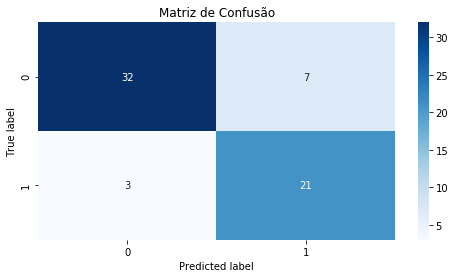

In [66]:
cm = confusion_matrix(y_test, y_pred_train)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [67]:
accuracy_score(y_test, y_pred_train)

0.8412698412698413

In [68]:
print(classification_report(y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.75      0.88      0.81        24

    accuracy                           0.84        63
   macro avg       0.83      0.85      0.84        63
weighted avg       0.85      0.84      0.84        63



In [69]:
fp, tp, thresholds = roc_curve(y_test, y_pred_train_proba[:, 1])

Text(0.5, 1.0, 'Curva ROC')

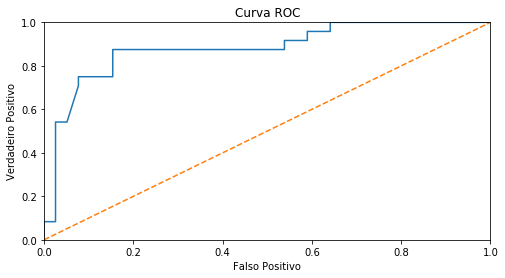

In [70]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [71]:
auc(fp, tp)

0.8814102564102564

# Resultado

In [72]:
model_forest.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [73]:
end_test = test_mean_std_max[features]
y_pred_test_proba = model_forest.predict_proba(end_test)

In [74]:
y_pred_test_proba = y_pred_test_proba[:, 1]

In [75]:
passageiro_id = test['PassengerId']

In [77]:
resultado = pd.concat([passageiro_id, pd.DataFrame(y_pred_test_proba, columns=['Survived'])], axis=1)

In [78]:
resultado.to_csv('submission.csv', index=False)